In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import json

# scraping
from bs4 import BeautifulSoup
import urllib.request

# scale figures
scale_factor = 2
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*4
# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

print( "success" )

# data source
# https://www.census.gov/geo/maps-data/data/cbf/cbf_sld.html

# voting records  https://votesmart.org/bills/IA/2018/2#.WvTmyZch200
# senate   https://votesmart.org/bill/votes/62842#.WvTzNpch200
# house  https://votesmart.org/bill/votes/62843#.WvTzO5ch200
# senate concurrence  https://votesmart.org/bill/votes/62844#.WvTzQpch200

success


In [2]:
data_path = 'data/iowa lower/cb_2017_19_sldl_500k.shp'
shapes = gp.GeoDataFrame.from_file(data_path)

print(shapes.head())

  STATEFP SLDLST        AFFGEOID  GEOID NAME LSAD   LSY       ALAND    AWATER  \
0      19    005  620L500US19005  19005    5   LL  2016  2704369790   4140631   
1      19    040  620L500US19040  19040   40   LL  2016    36502067     59113   
2      19    080  620L500US19080  19080   80   LL  2016  3687499405  55668391   
3      19    002  620L500US19002  19002    2   LL  2016  3302363979  28552291   
4      19    058  620L500US19058  19058   58   LL  2016  2848167950  37721076   

                                            geometry  
0  POLYGON ((-96.63970399999999 42.737071, -96.63...  
1  POLYGON ((-93.81446299999999 41.629058, -93.81...  
2  POLYGON ((-93.099217 41.160867, -92.9942169999...  
3  POLYGON ((-95.388627 43.01056699999999, -95.38...  
4  POLYGON ((-91.36578899999999 41.94741, -91.365...  


<Figure size 432x288 with 0 Axes>

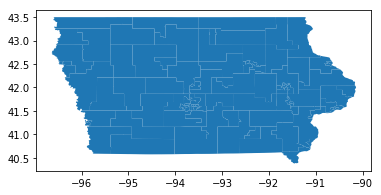

success


In [3]:
# plot all the house districts

plt.figure()
shapes.plot()
#plt.gca().set_aspect('equal',adjustable='box')
plt.axis('scaled')
plt.show()
print('success')


0
1
2
3
4
5
6
7
8
9


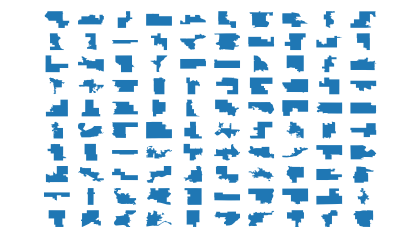

In [4]:
K = 10
f, axarr = plt.subplots(K,K)
shape_selection_index = 0

for rowidx in range(K):
    print(rowidx)
    for colidx in range(K):
        plt.sca(axarr[rowidx,colidx])
        if (shape_selection_index <= shapes.shape[0]):
            shapes.loc[[shape_selection_index],'geometry'].plot(ax=axarr[rowidx,colidx])
            axarr[rowidx,colidx].axis('scaled')
            axarr[rowidx,colidx].axis('off')

            shape_selection_index += 1

(-96.68462474999998, -95.69636824999998, 42.267864899999985, 42.94073709999999)

<Figure size 432x288 with 0 Axes>

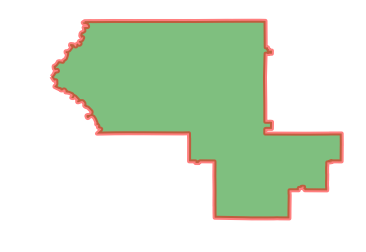

In [5]:


shape_selection_index = 0

plt.figure()
shapes.loc[[shape_selection_index],'geometry'].plot(alpha=0.5, linewidth=4, edgecolor='red', facecolor='green')
plt.axis('scaled')
plt.axis('off')

In [6]:
# voting records  https://votesmart.org/bills/IA/2018/2#.WvTmyZch200
# senate   https://votesmart.org/bill/votes/62842#.WvTzNpch200
# house  https://votesmart.org/bill/votes/62843#.WvTzO5ch200
# senate concurrence  https://votesmart.org/bill/votes/62844#.WvTzQpch200


# get votes
target_url = 'https://votesmart.org/bill/votes/62843#.WvTzO5ch200'
with urllib.request.urlopen(target_url) as response:
    page = response.read()
    soup = BeautifulSoup(page, 'html.parser')
    vote_table = soup.table
    table_rows = vote_table.find_all('tr')
    table_rows.pop(0) # first row is headers, throw away
    
vote_record = []
    
offset = 1 # 1 row for the headers
for row in table_rows:
    columns = row.find_all('td')
    
    name_info = columns[2].span
    name_parts = name_info.find_all('span')
    name = ""
    for part in name_parts:
        name = name + part.text + ' '
    
    district = columns[1].text
    vote = columns[4].text
    party = columns[3].text
    votesmart_page = 'www.votesmart.org' + str(columns[2].a['href'])
    
    vote_object = {"district":district, "name":name, "vote":vote, "party":party, "votesmart_page":votesmart_page}
    vote_record.append(vote_object)

# store for later use
target_path = 'data/SF359 house vote record.json'
with open(target_path, 'w') as outfile:  
    json.dump(vote_record, outfile)

print(vote_record)

[{'district': '1', 'name': 'Rep. John H. Wills ', 'vote': 'Yea', 'party': 'Republican', 'votesmart_page': 'www.votesmart.org/candidate/151202/john-wills'}, {'district': '2', 'name': 'Rep. Megan Jones ', 'vote': 'Yea', 'party': 'Republican', 'votesmart_page': 'www.votesmart.org/candidate/137928/megan-jones'}, {'district': '3', 'name': 'Rep. Daniel A. Huseman ', 'vote': 'Yea', 'party': 'Republican', 'votesmart_page': 'www.votesmart.org/candidate/6507/daniel-huseman'}, {'district': '4', 'name': 'Rep. Skyler Wheeler ', 'vote': 'Yea', 'party': 'Republican', 'votesmart_page': 'www.votesmart.org/candidate/168685/skyler-wheeler'}, {'district': '5', 'name': 'Rep. Charles Holz ', 'vote': 'Yea', 'party': 'Republican', 'votesmart_page': 'www.votesmart.org/candidate/166012/chuck-holz'}, {'district': '6', 'name': 'Rep. Jacob Bossman ', 'vote': 'Yea', 'party': 'Republican', 'votesmart_page': 'www.votesmart.org/candidate/168689/jacob-bossman'}, {'district': '7', 'name': 'Rep. Tedd Gassman ', 'vote': '

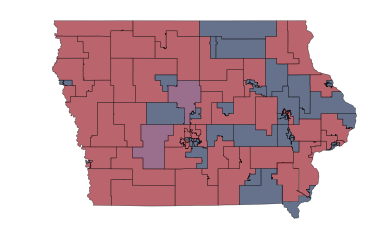

In [7]:
# color state districts based on vote record 
plt.figure()
ax = plt.gca()

for idx in range(shapes.shape[0]):
    
    district_id = shapes.loc[idx,'NAME']
    try:
        matching_record = [record for record in vote_record if record['district']==district_id][0]    
        if matching_record['vote']=='Yea':
            plot_color = 'xkcd:crimson'
        elif matching_record['vote']=='Nay':
            plot_color = 'xkcd:navy'
        else:
            plot_color = 'xkcd:plum'

        shapes.loc[[idx],'geometry'].plot(ax=ax, alpha=0.6, linewidth=0.5, edgecolor='black',facecolor=plot_color)
        
    except Exception as e: # no data
        print(e)
        
        plot_color='xkcd:gray' 
        shapes.loc[[idx],'geometry'].plot(ax=ax, alpha=0.6, linewidth=0.5, edgecolor='black',facecolor=plot_color)

    

#plt.axis('scaled')
plt.axis('off')
plt.savefig('iowa_house_SF359.svg')
plt.show()